## Boosting이란?
- 여러 개의 약한 Decision Tree를 조합해서 사용하는 Ensemble 기법 중 하나이다.
- 즉, 약한 예측 모델들의 학습 에러에 가중치를 두고, 순차적으로 다음 학습 모델에 반영하여 강한 예측모델을 만드는 것이다.

## GBM(Gradient Boosting Machine)
- GBM은 여러 개의 weak learner를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 가중치의 업데이트 방법은 **경사 하강법(Gradient Descent)**을 사용한다.

## XGBoost란?
- XGBoost는 Extrme Gradient Booting의 약자이다.
- Boosting 기법을 이용하여 구현한 알고리즘은 Gradient Boost가 대표적인데 이 알고리즘을 병렬학습이 지원되도록 구현한 라이브러리가 XGBoost이다.
- **Regression, Classifier 문제를 모두 지원**하며, 성능과 자원 효율이 좋아서 인기있는 알고리즘이다.
- XGBoost의 장점 
 1. GBM대비 빠른 수행시간: 병렬 처리로 학습, 분류 속도가 빠르다.
 2. 과적합 규제(Regularization): 표준GBM 경우 과적합 규제기능이 없으나, XGBoost는 자체에 과적합 규제 기능으로 강한 내구성을 지닌다.
 3. 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘한다.
  - 즉, CART(Classifier and Regrssion Tree)앙상블 모델을 사용한다.
 4. Early Stopping(조기 종료)rlsmddl dlTek.
 5. 다양한 옵션을 제공하며 Customizing이 용이하다.

### 필수 라이브러리

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
# 그래프 주피터 노트북에 표시, 폰트 더 선명하게
%matplotlib inline 
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='batang')

# Unicode 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

# 차트 스타일 지정
sns.set(font='batang', rc={'axes.unicode_minus':False}, style ='darkgrid')
plt.rc('figure', figsize=(10,8)) # 사이즈 지정

# 경고 무시
warnings.filterwarnings('ignore')

## 로지스틱 회귀와 평가지표

### 데이터셋_위스콘신 유방암 예측

In [3]:
!pip install xgboost

In [5]:
import xgboost as xgb # xgboost
from sklearn.datasets import load_breast_cancer # 데이터 로딩
from sklearn.model_selection import train_test_split # 세트 분리

# 변수에 데이터 담기
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
X = cancer.data
y = cancer.target

cancer_df = pd.DataFrame(data=X, columns=cancer.feature_names)
cancer_df['target'] = y
cancer_df.head()
# 정규화가 필요하겠군,,,

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
# 데이터와 타깃의 크기
X.shape, y.shape

((569, 30), (569,))

In [10]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
# 양성 유방암세트와 음성 유방암세트 개수 파악
np.unique(cancer.target, return_counts = True) # 건수랑 해당 값도 보려구

(array([0, 1]), array([212, 357], dtype=int64))

In [14]:
# 30개의 피쳐가 뭔지 확인
## enumerate 값과 인덱스 반환
for i, feature in enumerate(cancer.feature_names):
    print(f'feature{(i+1)} : ', feature)

feature1 :  mean radius
feature2 :  mean texture
feature3 :  mean perimeter
feature4 :  mean area
feature5 :  mean smoothness
feature6 :  mean compactness
feature7 :  mean concavity
feature8 :  mean concave points
feature9 :  mean symmetry
feature10 :  mean fractal dimension
feature11 :  radius error
feature12 :  texture error
feature13 :  perimeter error
feature14 :  area error
feature15 :  smoothness error
feature16 :  compactness error
feature17 :  concavity error
feature18 :  concave points error
feature19 :  symmetry error
feature20 :  fractal dimension error
feature21 :  worst radius
feature22 :  worst texture
feature23 :  worst perimeter
feature24 :  worst area
feature25 :  worst smoothness
feature26 :  worst compactness
feature27 :  worst concavity
feature28 :  worst concave points
feature29 :  worst symmetry
feature30 :  worst fractal dimension


### 표본 스케일링_standarization(표준화)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(cancer_df.drop('target', axis=1)) # 표준화

### 훈련세트와 테스트세트 분리

In [19]:
# 세트 분리
X_train, X_test, y_train, y_test = train_test_split(
scaled, cancer_df['target'], test_size=0.2, random_state=156)

#### 로지스틱 회귀 모델 학습

In [20]:
# 로지스틱
from sklearn.linear_model import LogisticRegression

#instance
lrr = LogisticRegression()
# fit
lrr.fit(X_train, y_train)

LogisticRegression()

In [21]:
# 훈련 모델을 이용하여 5개의 샘플 예측
print(lrr.predict(X_train[:5]))

[0 1 1 1 1]


- 악성종양(malignant)이 0값으로 1개, 양성종양(benign)이 1값으로 4개 예측

In [23]:
# 예측 확률
print(lrr.predict_proba(X_train[:5]))

[[9.90703488e-01 9.29651217e-03]
 [3.95649332e-02 9.60435067e-01]
 [6.71031350e-06 9.99993290e-01]
 [1.61627147e-04 9.99838373e-01]
 [8.73555079e-02 9.12644492e-01]]


In [24]:
# classes_속성
print(lrr.classes_)

[0 1]


In [25]:
# 로지스틱 회귀가 학습한 계수(기울기와 절편) 추출
print(lrr.coef_, lrr.intercept_)

[[-0.4721854  -0.38258173 -0.44454406 -0.54316124 -0.14319742  0.72706363
  -0.70746211 -0.96418695 -0.07905176  0.27001329 -1.19658305  0.19765208
  -0.5890956  -0.95010481 -0.31150744  0.75959144  0.14533365 -0.32546344
   0.33243796  0.4394735  -0.86822466 -1.27824666 -0.65146591 -0.90866007
  -0.44631307  0.16705142 -0.8564404  -0.83122684 -1.0734741  -0.54801513]] [0.21706473]


In [26]:
# 예측한 5개의 z 값 출력
decisions = lrr.decision_function(X_train[:5])
print(decisions)

[-4.66877599  3.18944318 11.91185818  8.7300568   2.34636033]


In [27]:
# 시그모이드 함수를 통과해서 
from scipy.special import expit
print(expit(decisions))

[0.00929651 0.96043507 0.99999329 0.99983837 0.91264449]


In [29]:
# 전체 예측하기
predict = lrr.predict(X_test)

In [18]:
lr.coef_, lr.intercept_

(array([ 2.34866411e-01, -2.46839171e-03, -3.25089250e-02, -1.64858367e-04,
        -6.39577460e-02,  5.03711313e+00, -1.13330230e-02, -6.17662144e+00,
         4.11318652e-01, -5.09448207e+00, -5.39408205e-01,  2.09055279e-02,
         1.30951166e-02,  1.51157528e-03, -2.04809335e+01,  2.90771809e+00,
         3.72254332e+00, -1.71255590e+01,  1.30233472e+00,  2.15877319e+00,
        -1.99200691e-01, -1.15347947e-02,  1.03878665e-02,  8.29164431e-04,
         6.13521807e-01, -7.61878573e-01, -8.52468315e-01,  1.48626243e+00,
        -1.05305973e+00, -1.72754163e+00]),
 3.00180780664828)

#### 평가지표
1. 회귀(regression): MAE, MSE, RMSE, SSE ...
2. 분류(classification): 정확도, 정밀도, 재현율(민감도), F1 스코어, ROC 커브
 - 정밀도와 민감도를 가장 많이 봄, f1은 우리가 만든 모델이 얼마나 정확한지(조화 평균)
 - 정확도 = 예측결과가 동일한 데이터 건수 / 전체예측 데이터 건수
3. 클러스트링(clustreing): DBI, 엘보우 메서드, 실루엣계수

In [30]:
# 정확도(Accuracy): 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표
## 이진분류의 경우 데이터에 따라 모델 성능이 왜곡될 수 있다.(데이터 편향시)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.9736842105263158

#### 혼돈 행렬(Confision Matrix, 오차 행렬)

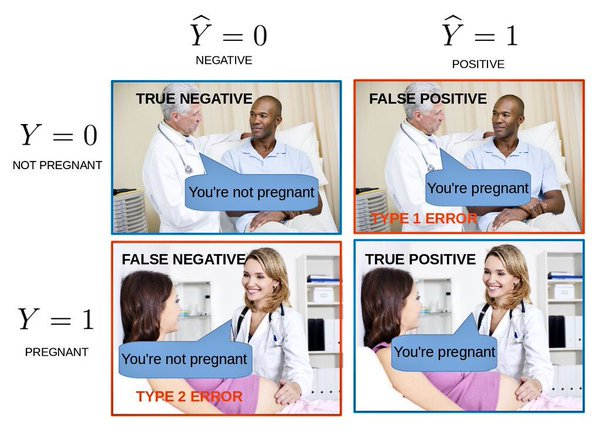

In [32]:
from IPython.display import Image
Image('https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg', width=600)

In [34]:
# 혼돈 행렬
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict) # 행렬
cm

array([[35,  2],
       [ 1, 76]], dtype=int64)

Text(67.875, 0.5, 'Actual')

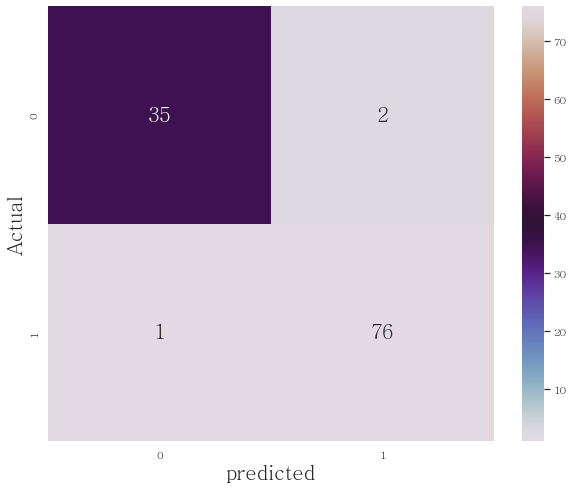

In [36]:
# 혼돈행렬 시각화
sns.heatmap(cm, annot=True, annot_kws={'size':20}, cmap='twilight')
plt.xlabel('predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [37]:
# 1차원 배열로 바꾸는 것
TN, FP, FN, TP = cm.ravel()

##### 정밀도(Precision)
- Positive로 예측한 전체 건수에서 옳게 예측한 건수의 비율

In [38]:
# 정밀도 구하는 공식
precision = TP / (FP+TP)
precision

0.9743589743589743

In [39]:
# 이렇게도 구할 수 있다.
from sklearn.metrics import precision_score
precision_score(y_test, predict)

0.9743589743589743

##### 재현율(Recall), 민감도
- 실제 Positive인 전체 건수에서 옳게 예측한 건수의 비율
- TPR(True Positive Rate)

In [40]:
# 재현율 구하는 공식
recall = TP / (FN +TP)
recall

0.987012987012987

In [41]:
# 사이킷런 함수 이용하여 구하기
from sklearn.metrics import recall_score
recall_score(y_test, predict)

0.987012987012987

##### F1 Score
- 재현율과 정밀도의 평균을 나타내는 수치

In [42]:
# f1 구하는 공식
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.9806451612903225

In [43]:
# 사이킷런 함수를 이용한 f1
from sklearn.metrics import f1_score
f1_score(y_test, predict)

0.9806451612903225

##### ROC곡선과 ACU

## XGBoost 모델 학습
###  위스콘신 유방암 예측

In [45]:
from xgboost import plot_importance

data = load_breast_cancer()
features = data.data
labels = data.target
df = pd.DataFrame(data=features, columns=data.feature_names)
df['target'] = labels
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [58]:
X_features = df.iloc[:,:-1]
y_label = df.iloc[:,-1]

xTrain, xTest, yTrain, yTest = train_test_split(
X_features, y_label, test_size=0.2, random_state=109)

X_tr, X_val, y_tr, y_val = train_test_split(xTrain, yTrain, test_size=0.1, random_state=109)


In [59]:
print(xTrain.shape, xTest.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [60]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=xTest, label=yTest)

In [61]:
params ={
    'max_depth': 3,
    'eta':0.05,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}
num_rounds = 400

In [63]:
eval_list = [(dtr, 'train'), (dval, 'eval')]

xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round = num_rounds,
                     early_stopping_rounds = 100, evals = eval_list)

[0]	train-logloss:0.65083	eval-logloss:0.65513
[1]	train-logloss:0.61241	eval-logloss:0.61945
[2]	train-logloss:0.57727	eval-logloss:0.58993
[3]	train-logloss:0.54523	eval-logloss:0.56496
[4]	train-logloss:0.51556	eval-logloss:0.53850
[5]	train-logloss:0.48826	eval-logloss:0.51420
[6]	train-logloss:0.46290	eval-logloss:0.49232
[7]	train-logloss:0.43902	eval-logloss:0.47189
[8]	train-logloss:0.41629	eval-logloss:0.45266
[9]	train-logloss:0.39562	eval-logloss:0.43501
[10]	train-logloss:0.37590	eval-logloss:0.41840
[11]	train-logloss:0.35755	eval-logloss:0.40302
[12]	train-logloss:0.34043	eval-logloss:0.38908
[13]	train-logloss:0.32489	eval-logloss:0.37421
[14]	train-logloss:0.31090	eval-logloss:0.36248
[15]	train-logloss:0.29651	eval-logloss:0.35089
[16]	train-logloss:0.28321	eval-logloss:0.34019
[17]	train-logloss:0.27076	eval-logloss:0.33024
[18]	train-logloss:0.25876	eval-logloss:0.32066
[19]	train-logloss:0.24807	eval-logloss:0.31163
[20]	train-logloss:0.23769	eval-logloss:0.30343
[2

[170]	train-logloss:0.01485	eval-logloss:0.09327
[171]	train-logloss:0.01478	eval-logloss:0.09284
[172]	train-logloss:0.01464	eval-logloss:0.09310
[173]	train-logloss:0.01449	eval-logloss:0.09278
[174]	train-logloss:0.01443	eval-logloss:0.09200
[175]	train-logloss:0.01436	eval-logloss:0.09204
[176]	train-logloss:0.01427	eval-logloss:0.09134
[177]	train-logloss:0.01420	eval-logloss:0.09130
[178]	train-logloss:0.01407	eval-logloss:0.09154
[179]	train-logloss:0.01399	eval-logloss:0.09175
[180]	train-logloss:0.01393	eval-logloss:0.09101
[181]	train-logloss:0.01387	eval-logloss:0.09065
[182]	train-logloss:0.01380	eval-logloss:0.09030
[183]	train-logloss:0.01371	eval-logloss:0.09014
[184]	train-logloss:0.01363	eval-logloss:0.08950
[185]	train-logloss:0.01355	eval-logloss:0.08967
[186]	train-logloss:0.01349	eval-logloss:0.08978
[187]	train-logloss:0.01343	eval-logloss:0.08965
[188]	train-logloss:0.01332	eval-logloss:0.08971
[189]	train-logloss:0.01325	eval-logloss:0.08991
[190]	train-logloss:

[338]	train-logloss:0.00832	eval-logloss:0.07526
[339]	train-logloss:0.00831	eval-logloss:0.07506
[340]	train-logloss:0.00830	eval-logloss:0.07519
[341]	train-logloss:0.00829	eval-logloss:0.07492
[342]	train-logloss:0.00828	eval-logloss:0.07513
[343]	train-logloss:0.00827	eval-logloss:0.07492
[344]	train-logloss:0.00826	eval-logloss:0.07511
[345]	train-logloss:0.00825	eval-logloss:0.07521
[346]	train-logloss:0.00824	eval-logloss:0.07495
[347]	train-logloss:0.00823	eval-logloss:0.07514
[348]	train-logloss:0.00821	eval-logloss:0.07490
[349]	train-logloss:0.00820	eval-logloss:0.07499
[350]	train-logloss:0.00819	eval-logloss:0.07477
[351]	train-logloss:0.00818	eval-logloss:0.07496
[352]	train-logloss:0.00817	eval-logloss:0.07472
[353]	train-logloss:0.00816	eval-logloss:0.07452
[354]	train-logloss:0.00815	eval-logloss:0.07473
[355]	train-logloss:0.00814	eval-logloss:0.07478
[356]	train-logloss:0.00813	eval-logloss:0.07451
[357]	train-logloss:0.00812	eval-logloss:0.07462
[358]	train-logloss:

### XGB 예측

In [69]:
# 예측 확률
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과 10개')
print(np.round(pred_probs[:10],3))

# 예측 분류
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측 분류 10개만 출력')
print(f"{preds[:10]}")


predict() 수행 결과 10개
[0.99  0.999 0.    0.001 0.975 0.    0.999 0.999 1.    0.   ]
예측 분류 10개만 출력
[1, 1, 0, 0, 1, 0, 1, 1, 1, 0]


### XGB 평가

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

# 평가 수행하는 함수 정의
def get_clf_eval(yTest, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(yTest, pred)
    accuracy = accuracy_score(yTest, pred)
    precision = precision_score(yTest, pred)
    recall = recall_score(yTest, pred)
    f1 = f1_score(yTest, pred)
    auc = roc_auc_score(yTest, pred_proba_po)
    
    print('오차행렬 : {}'.format(confusion))
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

In [71]:
# 함수 호출
get_clf_eval(yTest, pred= preds, pred_proba_po = pred_probs)

오차행렬 : [[38  2]
 [ 0 74]]
정확도: 0.9825, 정밀도: 0.9737, 재현율: 1.0000, F1: 0.9867, AUC: 0.9997


#### XGB 피처별 중요도

<function matplotlib.pyplot.show(close=None, block=None)>

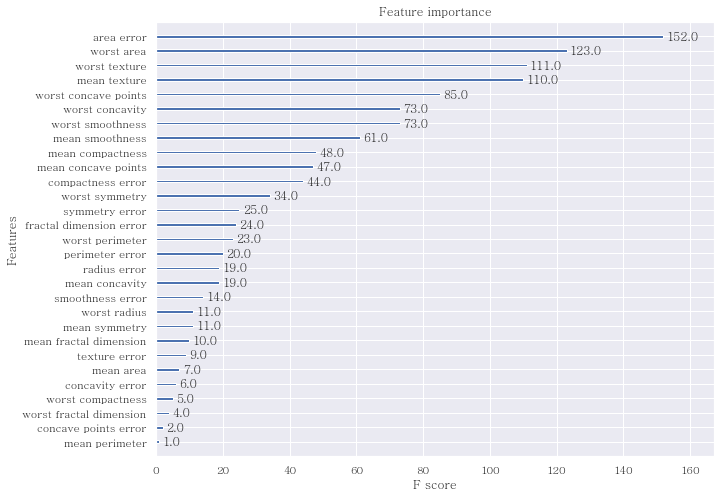

In [72]:
from xgboost import plot_importance

# 피처별 중요도를 그려주는 함수
plot_importance(xgb_model)
plt.show

#### XGB 시각화

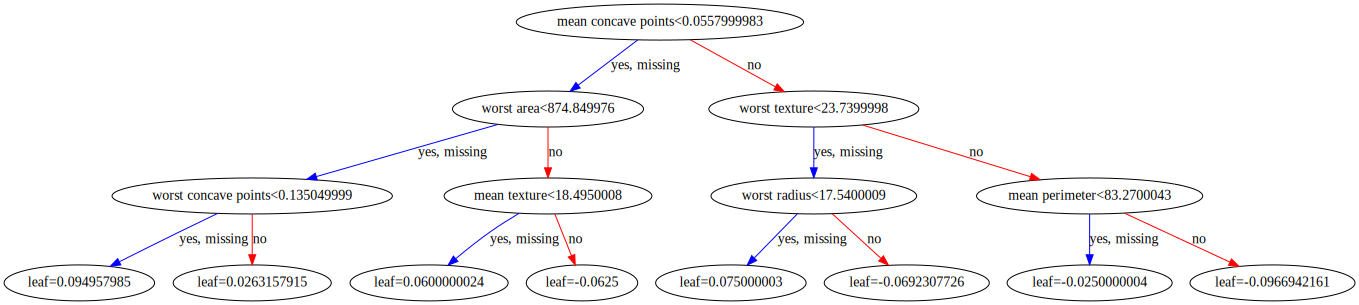

In [73]:
from xgboost import to_graphviz
import graphviz

to_graphviz(xgb_model)

#### XGB 교차검증

In [75]:
xgb.cv(params=params, dtrain=dtr, num_boost_round=10, nfold=3,
      metrics='logloss')

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.651173,0.000365,0.655384,0.001417
1,0.613050,0.000580,0.620986,0.002287
2,0.578188,0.000771,0.589308,0.003355
3,0.546701,0.001172,0.561303,0.004127
4,0.517178,0.001078,0.534655,0.005264
5,0.490198,0.001487,0.510885,0.005679
6,0.465314,0.001994,0.488229,0.006631
7,0.441641,0.001871,0.467392,0.007538
8,0.419874,0.001867,0.448267,0.008633
9,0.399722,0.002315,0.430595,0.009566


### 예측_위스콘신 유방암

In [77]:
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

df = pd.DataFrame(data=X_features, columns= dataset.feature_names)
df['target']= y_label
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### XGB 학습/예측/평가

In [79]:
from xgboost import XGBClassifier

# 파이썬 래퍼와 동일한 하이퍼 파라미터 수치
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)

w_preds = xgb_wrapper.predict(X_test)
w_pred_probs=xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred=w_preds, pred_proba_po = w_pred_probs)

오차행렬 : [[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC: 0.9951


#### XGB 조기 중단

In [82]:
from xgboost import XGBClassifier

# instance
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

# eval set
evals = [(X_test, y_test)]

#fitting
xgb_wrapper.fit(X_train, y_train,early_stopping_rounds=100,
               eval_metric='logloss', eval_set = evals, verbose=True)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08620
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08645
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

- XGBRegressor 하이퍼파라미터
  1. 일반 파라미터 : 부스팅을 수행할 때 트리를 사용할지, 선형 모델을 사용할지 등을 고려
    - booster[기본값 = gbtree] : 어떤 부스터 구조를 쓸지 결정
      - 의사결정기반모형(gbtree), 선형모형(gblinear), dart 가 있다.
    - n_jobs : XGBoost를 실행하는 데 사용되는 병렬 스레드 수   
    <br><br>
  2. 부스터 파라미터 : 선택한 부스터에 따라서 적용할 수 있는 파라미터가 다르다
    - learning_rate[기본값=0.3] : 높을수록 과적합하기 쉽다.
    - n_estimators[기본값 = 100] : 생성할 weak learner의 수, learning_rate가 낮을 때 높여야 과적합이 방지된다.
    - max_depth[기본값 = 6] : 트리의 maximun depth값, 적절한 값이 제시되어야 하고 보통 3-10 사이 값이 적용되며, max_depth가 높을수록 모델의 복잡도가 커져 과적합되기 슆다.
    - min_child_weight[기본값 = 1] : 관측치에 대한 가충치 합의 최소를 말하며 값이 높을수록 과적합이 방지된다.
    - gamma[기본값 = 0] : 리프노트의 추가분할을 결정할 최소손실 감소값, 해당 값보다 손실이 크게 감소할 때 분리한다.   
  <br><br>    
  3. 학습 과정 파라미터 : 학습 시나리오를 결정한다. 

In [84]:
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_probs = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred=ws100_preds, pred_proba_po=ws100_pred_probs)

오차행렬 : [[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC: 0.9954


#### XGB 피러별 중요도

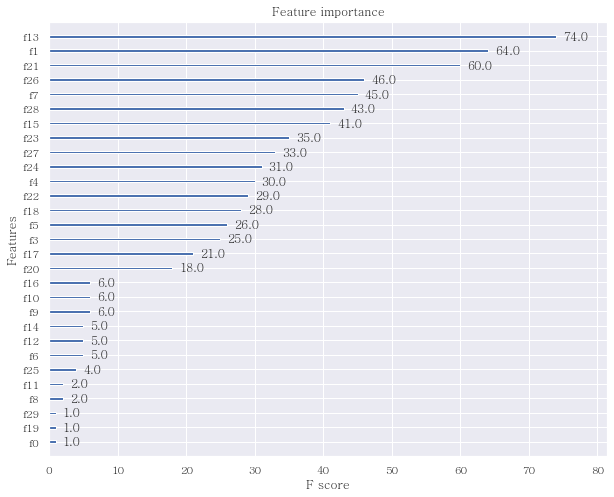

In [85]:
plot_importance(xgb_wrapper)
plt.show()

- **민감하게 조정해야 하는 것**
  - booster 모양
  - eval_metric(평가함수) / objective(목적함수)
  - eta 
  - L1 form (L1 레귤러라이제이션 폼이 L2보다 아웃라이어에 민감하다.)
  - L2 form
 <br><br> 
- **과적합 방지를 위해 조정해야 하는 것**
  - learning rate 낮추기 → n_estimators은 높여야함
  - max_depth 낮추기
  - min_child_weight 높이기
  - gamma 높이기
  - subsample, colsample_bytree 낮추기

## LightGBM

1. LightGBM 장단점
  - XGB보다도 학습에 걸리는 시간이 훨씬 적으며 메모리 사용량도 상대적으로 적다.
  - 카테고리형 피처를 자동 변환하고, 예측 성능 역시 큰 차이가 없다.
  - 데이터의 갯수가 적을 경우 과적합이 발생하기 쉽다.
  - 적은 데이터의 갯수에 대한 기준은 애매하지만 LightGBM의 공식 문서에서 10,000건 이하라고 기술하였다.
<br><br>
2. 트리 기반 알고리즘 특징
  - 기존의 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리 분할(Level Wise) 방식을 사용한다.
  - 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 깊이가 최소화 되며 오버피팅에 보다 강한 구조를 가진다.
  - 하지만 균형을 맞추기 위한 시간이 오래 걸리는 단점이 있다.
<br><br>
3. LightGBM 특징
  - LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 사용한다.
  - 트리의 균형을 맞추지 않고 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하여 깊이가 증가하고 비대칭적인 트리를 생성한다.
  - 이렇게 생성된 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 것이 LightGBM 구현사상이다.

In [ ]:
# lightgbm 설치
